In [2]:
# !pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------------------------------- -- 276.5/294.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


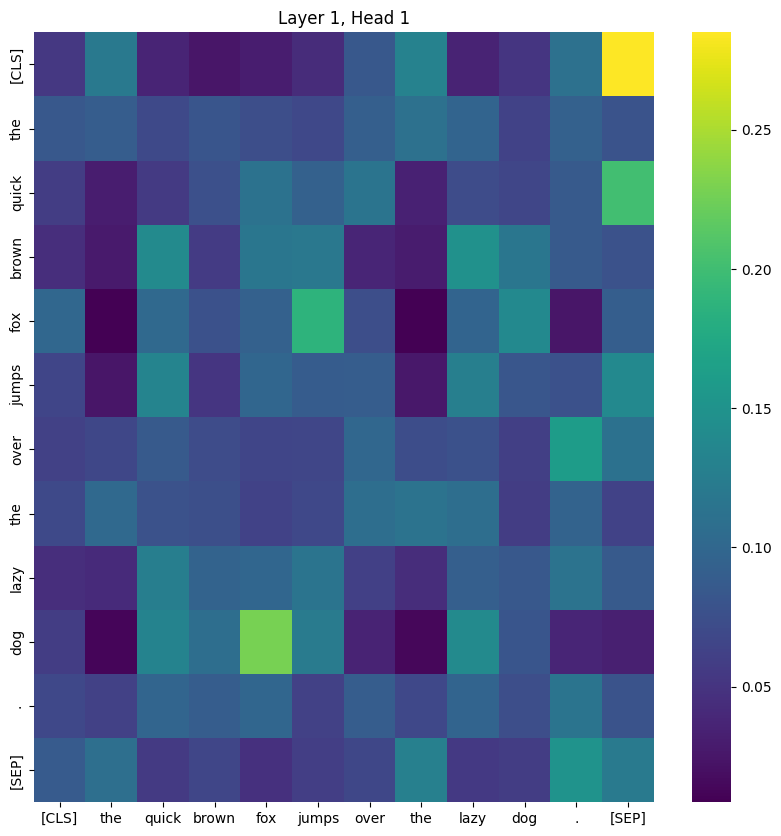

In [14]:
# from transformers import BertTokenizer, BertModel
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Load pre-trained model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# # Example sentence
# sentence = "The quick brown fox jumps over the lazy dog."

# # Tokenize input
# inputs = tokenizer(sentence, return_tensors='pt')

# # Forward pass, get attention weights
# outputs = model(**inputs)
# attention = outputs.attentions

# def plot_attention_heatmap(attention, layer_num, head_num, tokenizer, inputs):
#     tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
#     attention = attention[layer_num][0, head_num].detach().numpy()

#     plt.figure(figsize=(10, 10))
#     sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
#     plt.title(f'Layer {layer_num + 1}, Head {head_num + 1}')
#     plt.show()

# # Plot the attention heatmap for the first layer and first head
# plot_attention_heatmap(attention, layer_num=0, head_num=0, tokenizer=tokenizer, inputs=inputs)


In [ ]:
from transformers import AutoTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf
checkpoint = 'FacebookAI/roberta-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFRobertaForSequenceClassification.from_pretrained(checkpoint)

In [1]:
inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")

logits = model(**inputs).logits

predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
model.config.id2label[predicted_class_id]

c:\Users\marko\miniconda3\envs\tf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[768,3072] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:AddV2] name: 

In [ ]:
# 6/5 worked on 

import pandas as pd
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
raw_data = {
    "text": ["A sloping top", "To react too much", "The process of spoiling the state of being spoilt", "A small amount of something , especially a small amount of colour"],
    "tgt": ["A decorative feature that sits on top of something","To react too much or too intensely","The process of spoiling","A small added amount of colour a small added amount of some other thing"],
    "labels": [1, 0, 1, 0]
}
df = pd.DataFrame(raw_data)

# Load pre-trained BERT model and tokenizer

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True, max_length=128)
    outputs = model(inputs)
    return tf.reduce_mean(outputs.last_hidden_state, axis=1)

# Apply the function to the "text" column
embeddings = df['text'].apply(lambda x: get_embeddings(x).numpy().squeeze())
embeddings = np.stack(embeddings.to_numpy())

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings = tsne.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['labels'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], label='Labels')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
